<a href="https://colab.research.google.com/github/forMwish/MyDeepLearn/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import numpy as np

def one_hot(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, data in enumerate(sequences):
    result[i, data] = 1.
  return result

train_x = one_hot(train_data, 10000)
test_x = one_hot(test_data, 10000)
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
       loss=losses.binary_crossentropy,
       metrics=metrics.binary_accuracy)

In [ ]:
x_val = train_x[0:10000]
partial_train_x = train_x[10000:]

y_val = train_y[0:10000]
partial_train_y = train_y[10000:]

history = model.fit(partial_train_x,
            partial_train_y,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5807 - binary_accuracy: 0.7115 - val_loss: 0.4076 - val_binary_accuracy: 0.8389
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3139 - binary_accuracy: 0.9012 - val_loss: 0.2986 - val_binary_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2216 - binary_accuracy: 0.9309 - val_loss: 0.2756 - val_binary_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1704 - binary_accuracy: 0.9463 - val_loss: 0.2868 - val_binary_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1329 - binary_accuracy: 0.9605 - val_loss: 0.2824 - val_binary_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1102 - binary_accuracy: 0.9674 - val_loss: 0.3174 - val_binary_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - los

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


OSError: ignored

In [ ]:
np.save("/gdrive/MyDrive/train_history/history_imdb", history.history)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


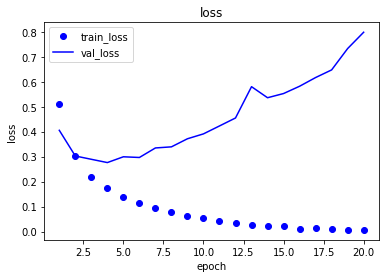

In [ ]:
print(history.history.keys())

import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
train_acc = history_dict['binary_accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_binary_accuracy']

epoch = range(1, len(train_loss) + 1)
plt.plot(epoch, train_loss, 'bo', label="train_loss")
plt.plot(epoch, val_loss, 'b', label="val_loss")
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

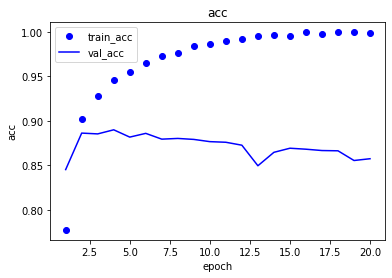

In [ ]:
epoch = range(1, len(train_loss) + 1)
plt.plot(epoch, train_acc, 'bo', label="train_acc")
plt.plot(epoch, val_acc, 'b', label="val_acc")
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
pred = model.predict(test_x).reshape(-1)
print(pred)
pred = (pred >= 0.5).astype(np.float32)
print(pred)
print(test_y)
result = (pred == test_y).astype(np.float32)
print(result)
result = result.sum()/result.size
print(result)

[0.01270282 1.         0.9994049  ... 0.00593534 0.11738936 0.9801932 ]
[0. 1. 1. ... 0. 0. 1.]
[0. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 0.]
0.84516


In [ ]:
history_imdb_add = np.load("/gdrive/MyDrive/train_history/history_imdb_add.npy", allow_pickle=True)
history_imdb = np.load("/gdrive/MyDrive/train_history/history_imdb.npy", allow_pickle=True)
print(history_imdb_add)

{'loss': [0.5125849843025208, 0.3055156171321869, 0.22470541298389435, 0.1777271032333374, 0.14000409841537476, 0.11769580841064453, 0.0935334786772728, 0.0750451609492302, 0.0610412135720253, 0.04818207770586014, 0.0361907035112381, 0.030203623697161674, 0.02313540317118168, 0.017450563609600067, 0.016181815415620804, 0.007861576974391937, 0.007983454503118992, 0.006707549095153809, 0.002655372954905033, 0.005606925114989281], 'binary_accuracy': [0.7927333116531372, 0.9065333604812622, 0.9290666580200195, 0.9441333413124084, 0.9580666422843933, 0.9652000069618225, 0.9733333587646484, 0.9792666435241699, 0.984333336353302, 0.9886000156402588, 0.9934666752815247, 0.9944666624069214, 0.996399998664856, 0.9973333477973938, 0.9971333146095276, 0.9995999932289124, 0.9993333220481873, 0.9989333152770996, 0.9999333620071411, 0.9992666840553284], 'val_loss': [0.4083905518054962, 0.31195494532585144, 0.2869933545589447, 0.27390095591545105, 0.2828066051006317, 0.2921358346939087, 0.318663865327

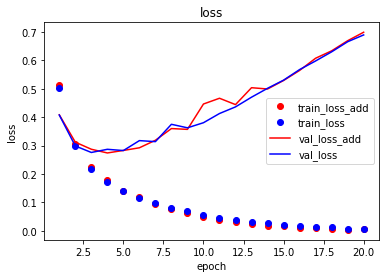

In [ ]:
import matplotlib.pyplot as plt

history_dict_add = history_imdb_add.item()
history_dict = history_imdb.item()

train_loss_add = history_dict_add['loss']
train_acc_add = history_dict_add['binary_accuracy']
val_loss_add = history_dict_add['val_loss']
val_acc_add = history_dict_add['val_binary_accuracy']

train_loss = history_dict['loss']
train_acc = history_dict['binary_accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_binary_accuracy']

epoch = range(1, len(train_loss) + 1)
plt.plot(epoch, train_loss_add, 'ro', label="train_loss_add")
plt.plot(epoch, train_loss, 'bo', label="train_loss")
plt.plot(epoch, val_loss_add, 'r', label="val_loss_add")
plt.plot(epoch, val_loss, 'b', label="val_loss")
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()


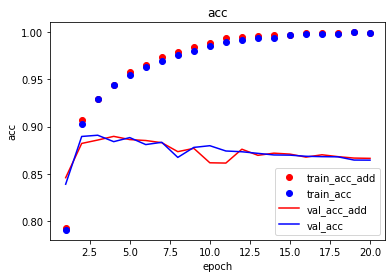

In [ ]:
plt.plot(epoch, train_acc_add, 'ro', label="train_acc_add")
plt.plot(epoch, train_acc, 'bo', label="train_acc")
plt.plot(epoch, val_acc_add, 'r', label="val_acc_add")
plt.plot(epoch, val_acc, 'b', label="val_acc")
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()

plt.show()